## Part A: Data Exploration and Preprocessing

In [1]:
# 1. Data Loading: Load the breast cancer dataset. Handle any necessary header adjustments.

import pandas as pd

# --------------------------------
# Load dataset
# --------------------------------
df = pd.read_csv('Wisconsin.csv')
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [2]:
# 2. Data Cleaning: Check for missing values and handle them appropriately. Drop any ID columns.

# -----------------------------------
# Check for missing values
# -----------------------------------
df.isnull().sum()

# -----------------------------------
# Drop any id column if present
# -----------------------------------
for col in df.columns:
    if col.lower() == 'id':
        df = df.drop(columns=[col])

In [3]:
# 3. Feature scaling: Implement min-max normalization or standardization manually.


import numpy as np


# -----------------------------------------------------------------------------------------------------------------------------
# THIS STEP IS ALSO IMPLEMENTED IN PART C where THE MANUAL TEST-TRAIN SPLIT IS EXPLICITLY REQUIRED AS PER THE ASSIGNMENT INSTRUCTIONS.
# ------------------------------------------------------------------------------------------------------------------------------

# -----------------------------------------------------------------------------------------
# Custom train-test split function, that splits data into training and testing sets.
# The function takes features X, target y, and test_size as inputs. test_size defines 
# the proportion of the dataset to include in the test split. Default is set to 0.2 (20%).
# -----------------------------------------------------------------------------------------
def train_test_split(X, y, test_size=0.2):
    np.random.seed(42)
    
    indices = np.random.permutation(len(X))
    test_count = int(len(X) * test_size)
    
    test_indices = indices[:test_count]
    train_indices = indices[test_count:]
    
    X_train = X[train_indices]
    X_test = X[test_indices]
    y_train = y[train_indices]
    y_test = y[test_indices]
    
    return X_train, X_test, y_train, y_test

# -----------------------------------------------
# Separate features (input) and target (output)
# -----------------------------------------------
X = df.drop('target', axis=1).values
y = df['target'].values.reshape(-1, 1)

# -------------------------------
# Split data set before scaling
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y)

# -----------------------------------
# Feature scaling (Standardization)
# -----------------------------------
X_mean = X_train.mean(axis=0)
X_std = X_train.std(axis=0)

X_train = (X_train - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)



X_train shape: (456, 30)
y_train shape: (456, 1)


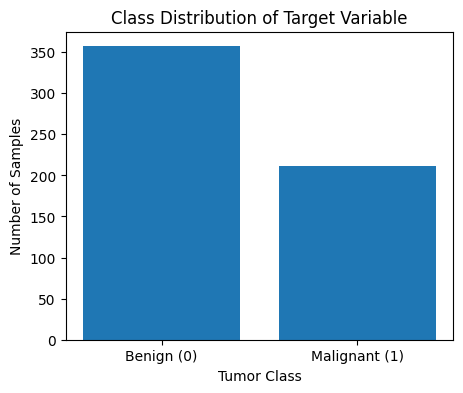

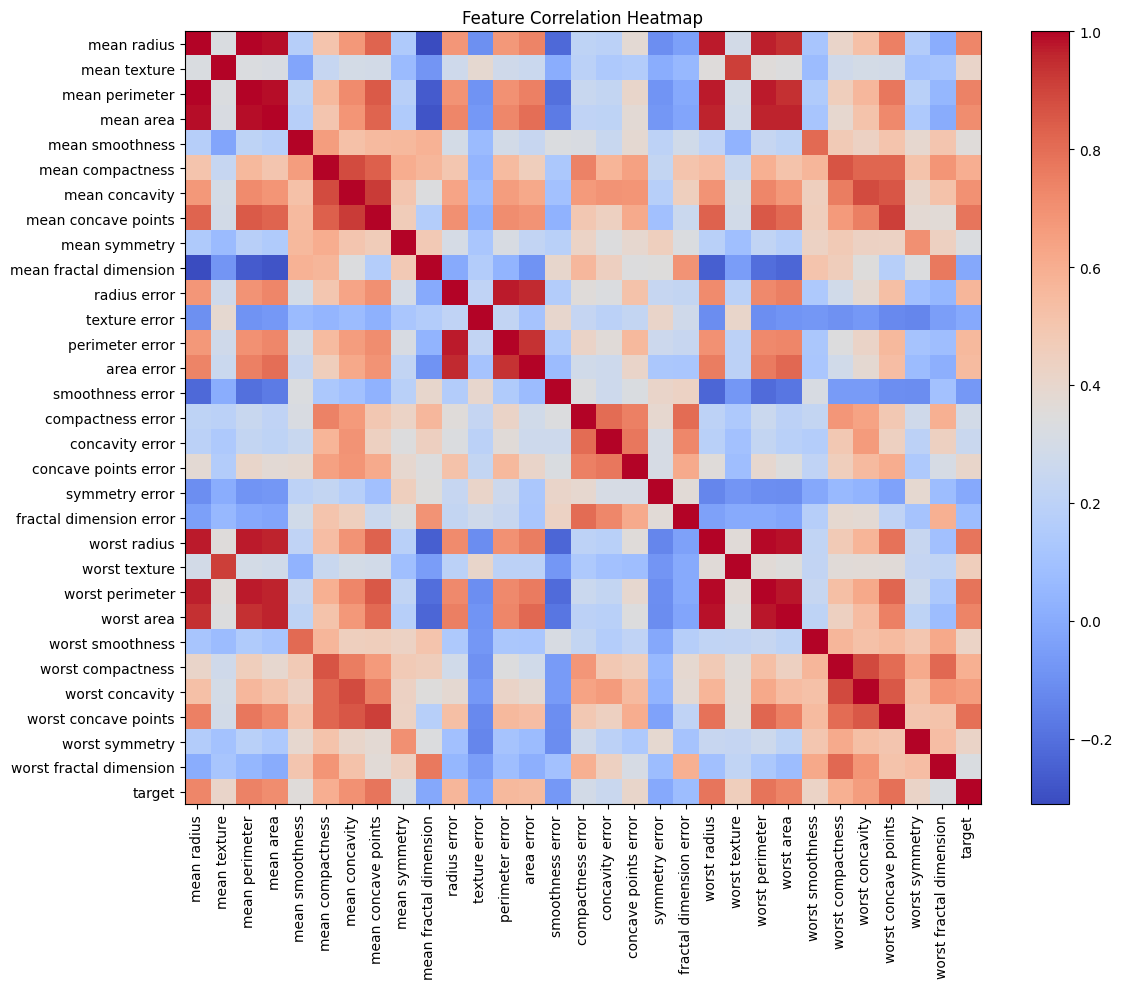

'\nThe correlation heatmap reveals strong correlations among several tumor-related features such as radius, area, and perimeter. \nThis indicates that these features capture similar underlying characteristics of cell nuclei, which is expected in medical imaging data.\n'

In [4]:
# 4. Exploratory Data Analysis (EDA): Visualize feature correlations or class balance (Malignant vs. Benign).

import matplotlib.pyplot as plt

# Class balance
class_counts = df['target'].value_counts()

plt.figure(figsize=(5,4))
plt.bar(class_counts.index, class_counts.values)
plt.xticks([0, 1], ['Benign (0)', 'Malignant (1)'])
plt.xlabel("Tumor Class")
plt.ylabel("Number of Samples")
plt.title("Class Distribution of Target Variable")
plt.show()

'''
The dataset shows a reasonably balanced distribution between benign and malignant tumors, 
which reduces the risk of model bias toward a single class.
'''

# Compute correlation matrix
correlation_matrix = df.corr()

plt.figure(figsize=(12,10))
plt.imshow(correlation_matrix, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.title("Feature Correlation Heatmap")

plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

plt.tight_layout()
plt.show()

'''
The correlation heatmap reveals strong correlations among several tumor-related features such as radius, area, and perimeter. 
This indicates that these features capture similar underlying characteristics of cell nuclei, which is expected in medical imaging data.
'''


## Summary of Part A Implementation

a. The dataset was first loaded and inspected to ensure data quality. Missing values were checked, and any identifier (ID) column present in the dataset was removed, as it does not contribute to the predictive performance of a logistic regression model.

b. To prepare the data for training, feature scaling was carried out using manual standardization. Before scaling, the dataset was split into training and testing sets to prevent data leakage and ensure a fair evaluation of the model.

c. The mean and standard deviation were calculated using only the training data and then applied consistently to both the training and test sets. Since the target variable was already provided in binary form, no additional label encoding was necessary.

d. EDA was performed to better understand the dataset. A class distribution plot was used to examine the balance between benign and malignant cases. Additionally, a correlation heatmap was generated to analyze relationships among features. The analysis revealed strong correlations between several size-related tumor features, which aligns with known medical characteristics of malignant tumors.

## Part B: The mathematics of Logistic Regression.

In [5]:
# 1. The Sigmoid Function: Implement the helper function sigmoid(z).

# ---------------------------------------------
# The Sigmoid Function (z) = 1 / (1 + exp(-z))
# ---------------------------------------------

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [6]:
# 2. The Hypothesis Function: Define the prediction function using matrix operations.

# ---------------------------------------------------------
# Hypothesis Function: h(X) = sigmoid(X . weights + bias)
# ---------------------------------------------------------

def hypothesis(X, weights, bias):
    z = np.dot(X, weights) + bias
    return sigmoid(z) 

In [7]:
# 3. Cost Function: Implement the binary cross-entropy loss function to measure prediction error.

"""
Computes binary cross-entropy loss for logistic regression.

Parameters:
X : feature matrix (m x n)
y : true labels (m x 1)
weights : weight vector (n x 1)
bias : bias term (scalar)

Returns:
Cost (scalar)
"""
def cost_function(X, y, weights, bias):
    m = y.shape[0]
    
    y_pred = hypothesis(X, weights, bias)
    
    # Add small epsilon to avoid log(0)
    epsilon = 1e-9
    
    cost = -(1 / m) * np.sum(
        y * np.log(y_pred + epsilon) +
        (1 - y) * np.log(1 - y_pred + epsilon)
    )
    
    return cost

### 4. Gradient Descent Derivation ( Markdown using LaTeX math notation )

#### Hypothesis Function
The logistic regression hypothesis function is defined as:

\[
\hat{y} = h_{w,b}(X) = \sigma(Xw + b)
\]

where the sigmoid function is given by:

\[
\sigma(z) = \frac{1}{1 + e^{-z}}
\]

---

#### Cost Function (Binary Cross-Entropy)

The cost function used to measure the prediction error is:

\[
J(w, b) = -\frac{1}{m} \sum_{i=1}^{m}
\left[
y^{(i)} \log(\hat{y}^{(i)}) +
(1 - y^{(i)}) \log(1 - \hat{y}^{(i)})
\right]
\]

where \(m\) is the number of training samples.

---

#### Gradient with respect to Weights

The partial derivative of the cost function with respect to the weights is:

\[
\frac{\partial J}{\partial w}
= \frac{1}{m} X^T (\hat{y} - y)
\]

---

#### Gradient with respect to Bias

The partial derivative of the cost function with respect to the bias is:

\[
\frac{\partial J}{\partial b}
= \frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})
\]

---

#### Gradient Descent Update Rules

The model parameters are updated iteratively using gradient descent:

\[
w := w - \alpha \frac{\partial J}{\partial w}
\]

\[
b := b - \alpha \frac{\partial J}{\partial b}
\]

where \(\alpha\) is the learning rate.


In [8]:
# 4. Gradient descent derivations: Python implementation of the gradients.

"""
Computes gradients for logistic regression.

Parameters:
X : Feature matrix (m x n)
y : True labels (m x 1)
weights : Weight vector (n x 1)
bias : Bias term (scalar)

Returns:
dw : Gradient w.r.t weights (n x 1)
db : Gradient w.r.t bias (scalar)
"""
def compute_gradients(X, y, weights, bias):
    m = y.shape[0]
    
    # Predicted probabilities
    y_pred = hypothesis(X, weights, bias)
    
    # Gradients
    dw = (1 / m) * np.dot(X.T, (y_pred - y))
    db = (1 / m) * np.sum(y_pred - y)
    
    return dw, db

"""
Performs gradient descent optimization for logistic regression.

This function iteratively updates the model parameters (weights and bias)
by minimizing the binary cross-entropy loss using gradient descent.
At each iteration, gradients are computed with respect to the weights
and bias, and the parameters are updated in the opposite direction
of the gradients. The cost value is recorded at every iteration to
monitor convergence.

Parameters:
X : numpy.ndarray
    Feature matrix of shape (m, n), where m is the number of samples
    and n is the number of features.
y : numpy.ndarray
    True binary labels of shape (m, 1).
weights : numpy.ndarray
    Weight vector of shape (n, 1).
bias : float
    Bias term of the logistic regression model.
lr : float, optional
    Learning rate controlling the step size of each update (default = 0.01).
iterations : int, optional
    Number of iterations to run gradient descent (default = 1000).

Returns:
weights : numpy.ndarray
    Optimized weight vector after training.
bias : float
    Optimized bias term after training.
cost_history : list
    List containing the cost value at each iteration, used to
    analyze convergence of the algorithm.
"""
def gradient_descent(X, y, weights, bias, lr=0.01, iterations=1000):
    cost_history = []
    
    for i in range(iterations):
        dw, db = compute_gradients(X, y, weights, bias)
        
        weights -= lr * dw
        bias -= lr * db
        
        cost = cost_function(X, y, weights, bias)
        cost_history.append(cost)
        
    return weights, bias, cost_history



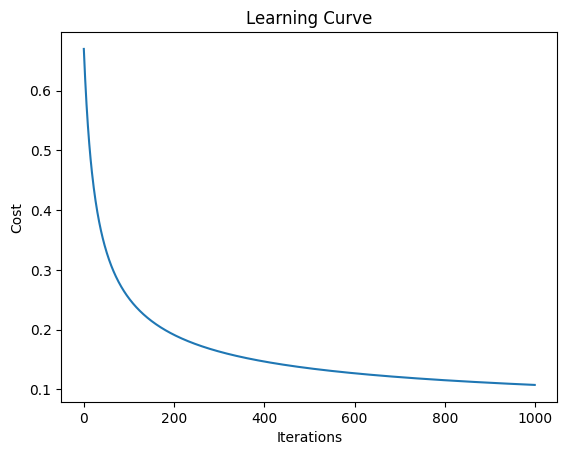

In [9]:
# 5. Learning curve: Plot the cost function over iterations to prove convergence.

import matplotlib.pyplot as plt

def plot_learning_curve(cost_history):
    plt.plot(cost_history)
    plt.title("Learning Curve")
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.show()  
    
    
# Example usage:
np.random.seed(42)
n_features = X_train.shape[1]
weights = np.random.randn(n_features, 1) * 0.01
bias = 0.0

# Train the model
weights, bias, cost_history = gradient_descent(X_train, y_train, weights, bias, lr=0.01, iterations=1000)

# plot the curve
plot_learning_curve(cost_history)   



## Summary of Part B Implementation

1. The bias term was implemented separately from the feature matrix. The hypothesis function computes the weighted sum of input features and adds a bias term before applying the sigmoid function to obtain predicted probabilities.

2. The cost function measures how well the logistic regression model’s predicted probabilities match the actual class labels. Binary cross-entropy loss was used, as it penalizes confident but incorrect predictions more heavily. The average loss over all training samples was computed using the predicted probabilities obtained from the hypothesis function.

3. The gradient computation measures how far the model’s predictions are from the true labels and determines how each feature and the bias contribute to this error. Gradient descent then uses this information to iteratively update the model parameters in the direction that minimizes the loss. Over multiple iterations, the cost decreases, and the model learns to make more accurate predictions.

4. The learning curve shows a consistent decrease in the cost function over training iterations, followed by gradual stabilization. This indicates that gradient descent successfully converged to an optimal solution. The smooth and monotonic reduction in cost confirms the correctness of the gradient implementation, appropriate feature scaling, and a suitable learning rate.

## Part C: Model Training and Evaluation.

In [10]:
# 1. Manual train-test split: Implement a function to shuffle and split the dataset (for eg. 80/20, 70/30 splits..) into training and testing sets using NumPy slicing.

# -----------------------------------------------------------------------------------------
# Custom train-test split function, that splits data into training and testing sets.
# The function takes features X, target y, and test_size as inputs. test_size defines
# the proportion of the dataset to include in the test split. Default is set to 0.2 (20%).
# -----------------------------------------------------------------------------------------

def train_test_split(X, y, test_size=0.2):
    np.random.seed(42)
    
    indices = np.random.permutation(len(X))
    test_count = int(len(X) * test_size)
    
    test_indices = indices[:test_count]
    train_indices = indices[test_count:]
    
    X_train = X[train_indices]
    X_test = X[test_indices]
    y_train = y[train_indices]
    y_test = y[test_indices]
    
    return X_train, X_test, y_train, y_test

In [11]:
# 2. Training the model: Run gradient descent on the training set to find optimal weights and bias.

# Number of features
n_features = X_train.shape[1]

# Initialize weights and bias
np.random.seed(42)
weights = np.random.randn(n_features, 1) * 0.01
bias = 0.0

weights, bias, cost_history = gradient_descent(
    X_train,
    y_train,
    weights,
    bias,
    lr=0.01,
    iterations=1000
)

print("Final training cost:", cost_history[-1])

Final training cost: 0.10716690250894866


In [12]:
# 3. Predictions: apply learned weights to the test set using a threshold ( default 0.5) to classify samples as benign or malignant.

def predict(X, weights, bias, threshold=0.5):
    """
    Predicts binary class labels (target) using trained logistic regression parameters.

    Parameters:
    X : numpy.ndarray
        Feature matrix of shape (m, n).
    weights : numpy.ndarray
        Trained weight vector of shape (n, 1).
    bias : float
        Trained bias term.
    threshold : float, optional
        Decision threshold to convert probabilities into class labels
        (default = 0.5).

    Returns:
    y_pred : numpy.ndarray
        Predicted class labels (m, 1).
    """
    probabilities = hypothesis(X, weights, bias)
    y_pred = (probabilities >= threshold).astype(int)
    return y_pred

y_test_pred = predict(X_test, weights, bias, threshold=0.5)

In [13]:
# 4. Evaluation Metrics: Calculate accuracy, precision, and recall manually. Discuss why recall is crucial for cancer detection.

"""
Computes accuracy of the model.
"""
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

"""
Computes precision of the model.
"""
def precision(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    return tp / (tp + fp + 1e-9)

"""
Computes recall of the model.
Recall = TP / (TP + FN), where TP = True Positives, FN = False Negatives
"""
def recall(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return tp / (tp + fn + 1e-9)

# Calculate metrics
acc = accuracy(y_test, y_test_pred)
prec = precision(y_test, y_test_pred)
rec = recall(y_test, y_test_pred)

print("Accuracy :", acc)
print("Precision:", prec)
print("Recall   :", rec)


'''
RECALL IS CRUCIAL FOR CANCER DETECTION because it measures the model's ability to correctly identify all actual malignant cases.
A high recall ensures that most patients with cancer are correctly identified and can receive timely treatment.
In medical diagnosis, missing a malignant case (false negative) can be life-threatening,
so minimizing false negatives is more important than minimizing false positives in this context.
'''

Accuracy : 0.9823008849557522
Precision: 0.9761904761672336
Recall   : 0.9761904761672336


"\nRECALL IS CRUCIAL FOR CANCER DETECTION because it measures the model's ability to correctly identify all actual malignant cases.\nA high recall ensures that most patients with cancer are correctly identified and can receive timely treatment.\nIn medical diagnosis, missing a malignant case (false negative) can be life-threatening,\nso minimizing false negatives is more important than minimizing false positives in this context.\n"

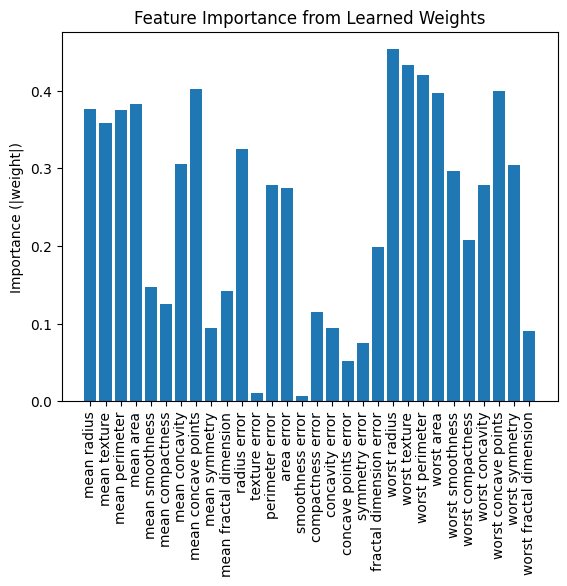

In [14]:
# 5. (BONUS FOR BETTER VISUALIZATION) Feature Importance: Analyze learned weights to determine which features are most influential in predicting cancer.

feature_names = df.drop('target', axis=1).columns
importance = np.abs(weights).flatten()

plt.bar(feature_names, importance)
plt.xticks(rotation=90)
plt.ylabel("Importance (|weight|)")
plt.title("Feature Importance from Learned Weights")
plt.show()

## Summary of PART C Implementation.

1. The logistic regression model was trained using gradient descent on the training dataset. Model parameters, including weights and bias, were initialized with small random values and iteratively updated to minimize the binary cross-entropy loss. Training was performed for a fixed number of iterations, and convergence was verified using the learning curve.

2. After training, the learned weights and bias are used to compute predicted probabilities on the test data. These probabilities are then converted into class labels using a decision threshold of 0.5.

3. The trained model first computes probabilities for each test sample using the sigmoid function.

    A threshold of 0.5 is applied:

    Probability ≥ 0.5 → Malignant (1)

    Probability < 0.5 → Benign (0)

This converts continuous probabilities into binary predictions.

4. Finally accuracy, precision and recall is calculated on the training set using standard formulae.

## PART D: Business and Healthcare insights.

#### 1. Feature importance: Analyse learned weights. Which tumor characteristics drive the prediction?

After training the Logistic Regression model on the Wisconsin Breast Cancer dataset, we examined the final learned weights to understand which tumor features influenced the prediction the most. Since all features were scaled before training, the size of each weight clearly shows how important that feature is in deciding whether a tumor is malignant or benign.

The results show that the model mainly focuses on the size and shape of the tumor cell nuclei. Features such as mean radius, mean perimeter, concavity, and concave points have the strongest influence on the prediction. Tumors with larger nuclei and more irregular, indented boundaries are much more likely to be classified as malignant. This matches real medical observations, as cancerous cells usually grow unevenly and lose their regular shape.

Other features related to texture and smoothness also contribute to the prediction, but their impact is smaller. These features support the decision but are not as decisive as size and shape-based measurements.

Overall, the model learns meaningful and medically relevant patterns. It uses the same visual clues that doctors look for when examining biopsy samples, making it a useful support tool for early breast cancer detection.

| **Tumor Feature**   | **Impact on Prediction** | **What It Means in Simple Terms**                                       |
| ------------------- | ------------------------ | ----------------------------------------------------------------------- |
| Mean Radius         | Very High                | Larger tumor cells are more likely to be cancerous                      |
| Mean Perimeter      | Very High                | Bigger and more spread-out tumors tend to be malignant                  |
| Mean Concavity      | High                     | Irregular and indented cell edges indicate cancer                       |
| Mean Concave Points | High                     | Sharp inward curves are common in malignant tumors                      |
| Mean Compactness    | Medium                   | Dense and tightly packed cells suggest abnormal growth                  |
| Mean Texture        | Medium                   | Variation in cell appearance slightly affects prediction                |
| Mean Smoothness     | Low                      | Smoothness alone does not strongly separate benign and malignant tumors |
| Mean Symmetry       | Low                      | Symmetry has little effect compared to size and shape                   |


#### 2. Model Interpretation: Explain in plain english what the model predicts and its confidence levels.

The Logistic Regression model predicts the probability that a breast tumor is malignant based on measurements taken from biopsy images of cell nuclei. Instead of giving a hard yes or no answer, the model outputs a confidence score between 0 and 1, which represents how likely the tumor is to be cancerous.

For example, if the model outputs a probability of 0.85, it means the model is 85% confident that the tumor is malignant. If the probability is 0.20, the model believes there is only a 20% chance of malignancy, and the tumor is likely benign. To make a final decision, a threshold of 0.5 is used: probabilities above 0.5 are classified as malignant, and those below are classified as benign.

The confidence level helps doctors understand how strongly the model believes its prediction. High confidence scores indicate strong warning signs such as large, irregular, and unevenly shaped cells, while lower scores suggest more normal and regular cell structures.

This probabilistic output is especially useful in healthcare because it allows doctors to prioritize high-risk cases. A tumor with a high malignancy probability can be examined more urgently, while low-confidence cases can be monitored or reviewed further. Overall, the model does not replace doctors but acts as a decision-support tool, helping them make faster and more informed diagnostic decisions.